## Angle 0

Videos / images ending with 0, 10, 20 and 30

[  0 255]
Consumed time ->  0.2666919231414795


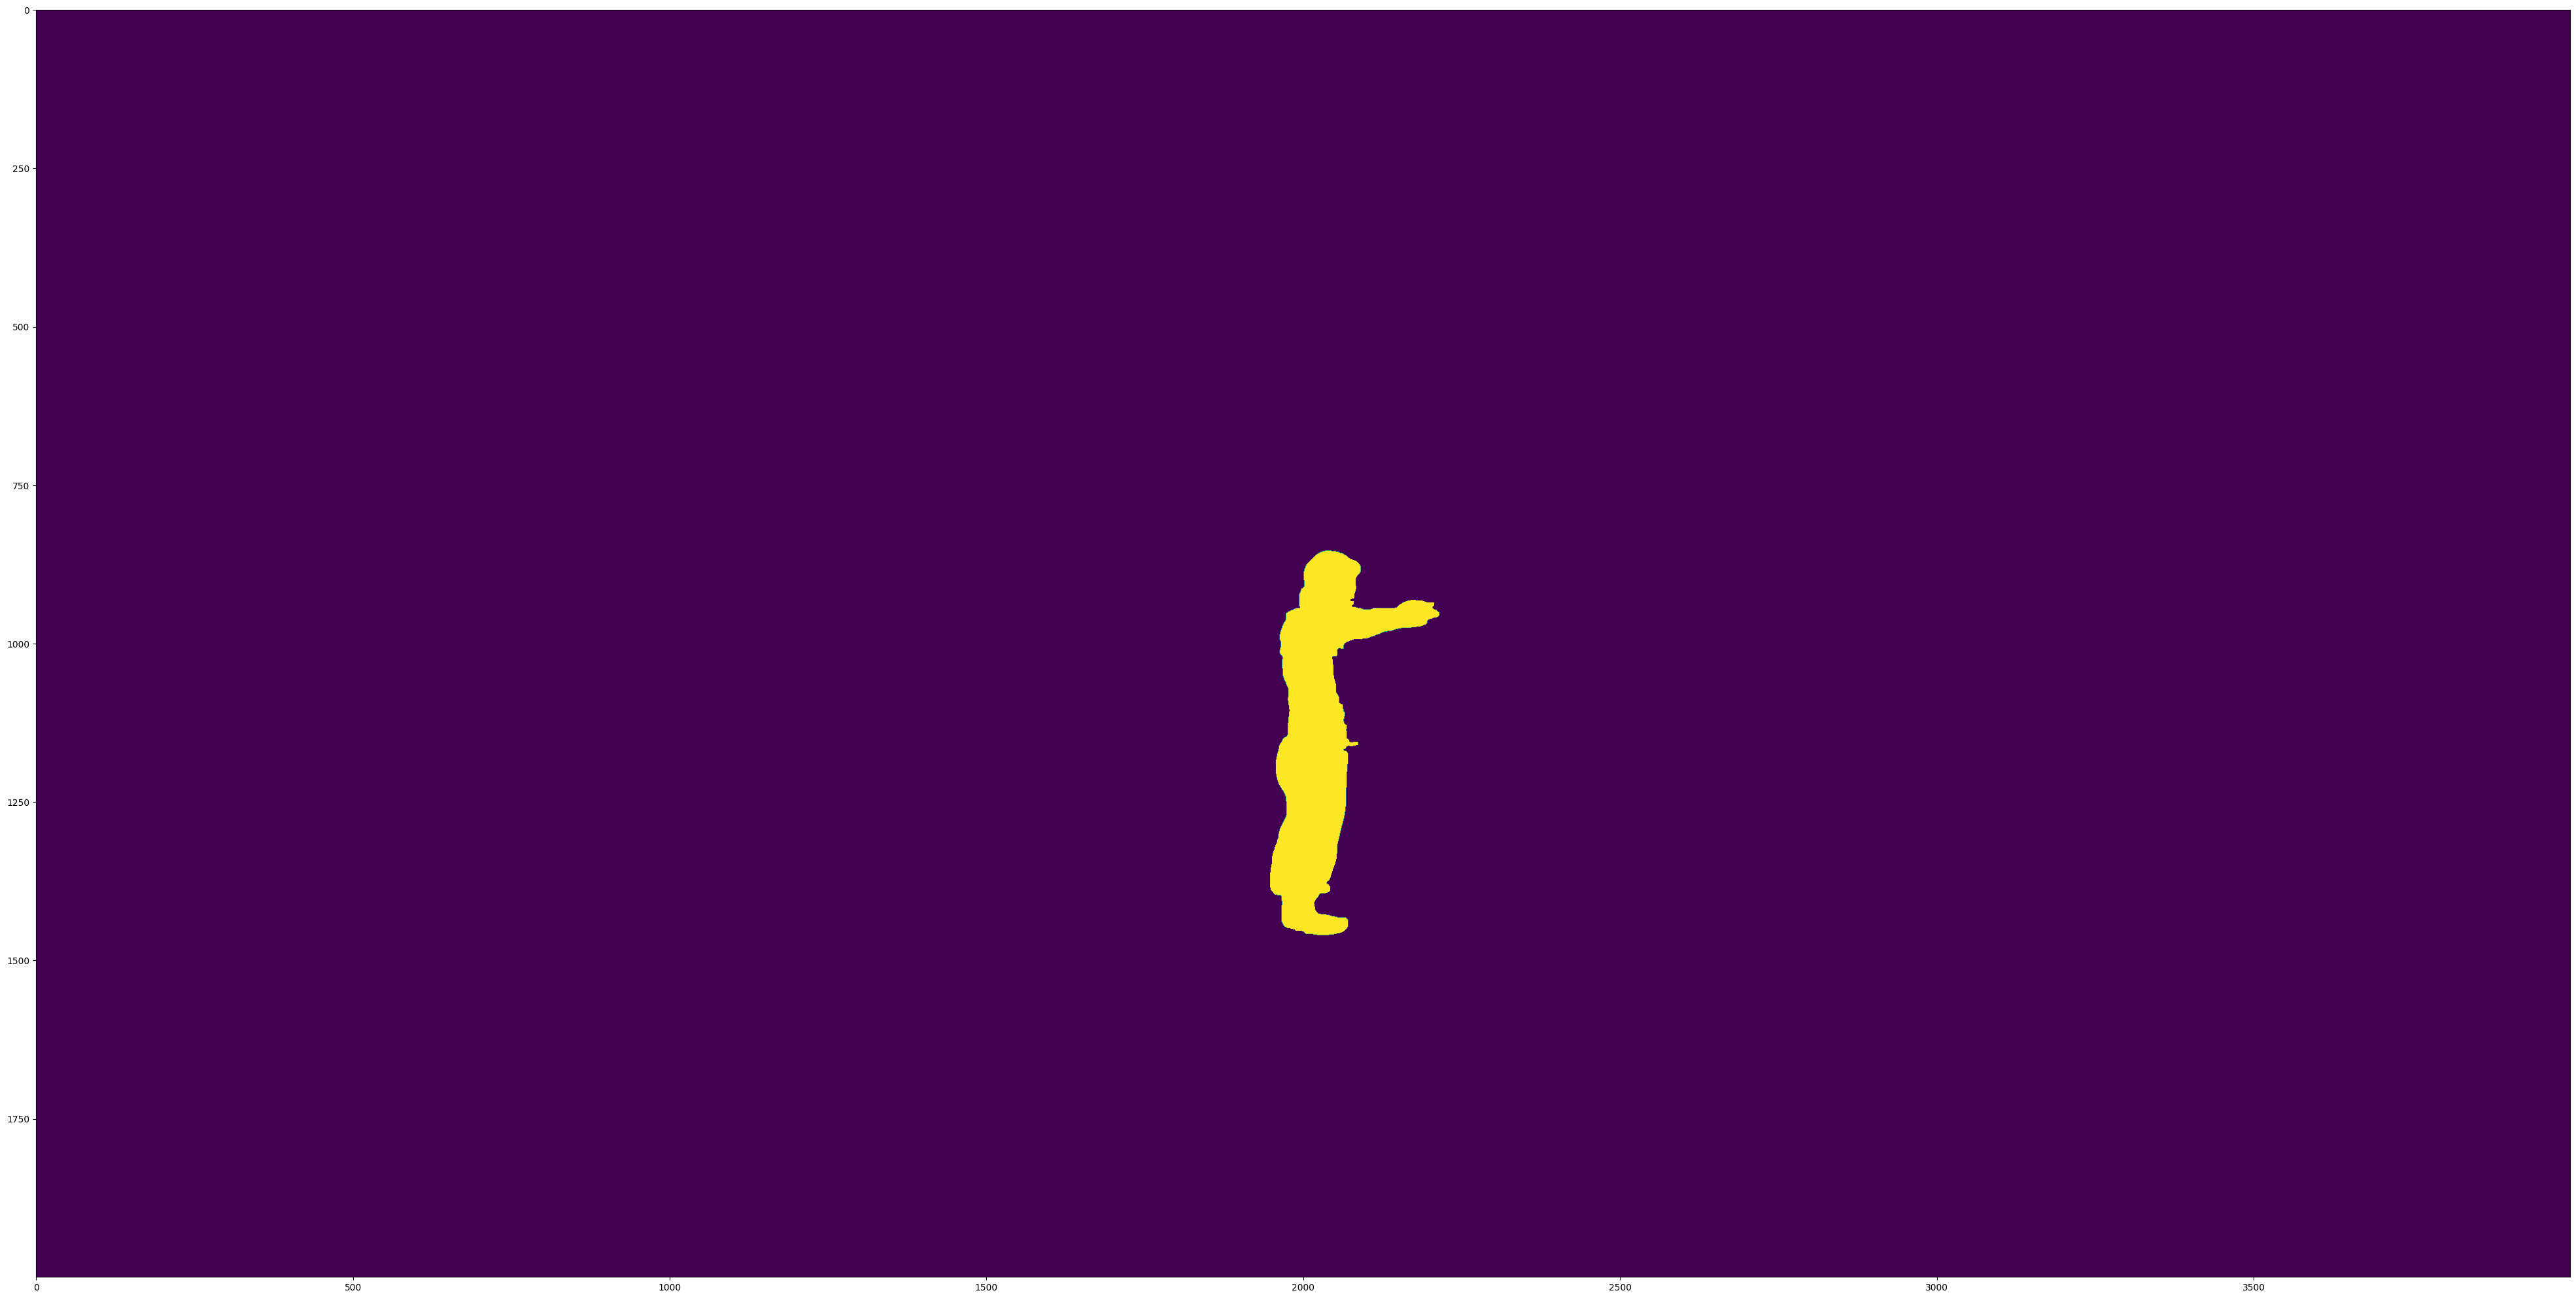

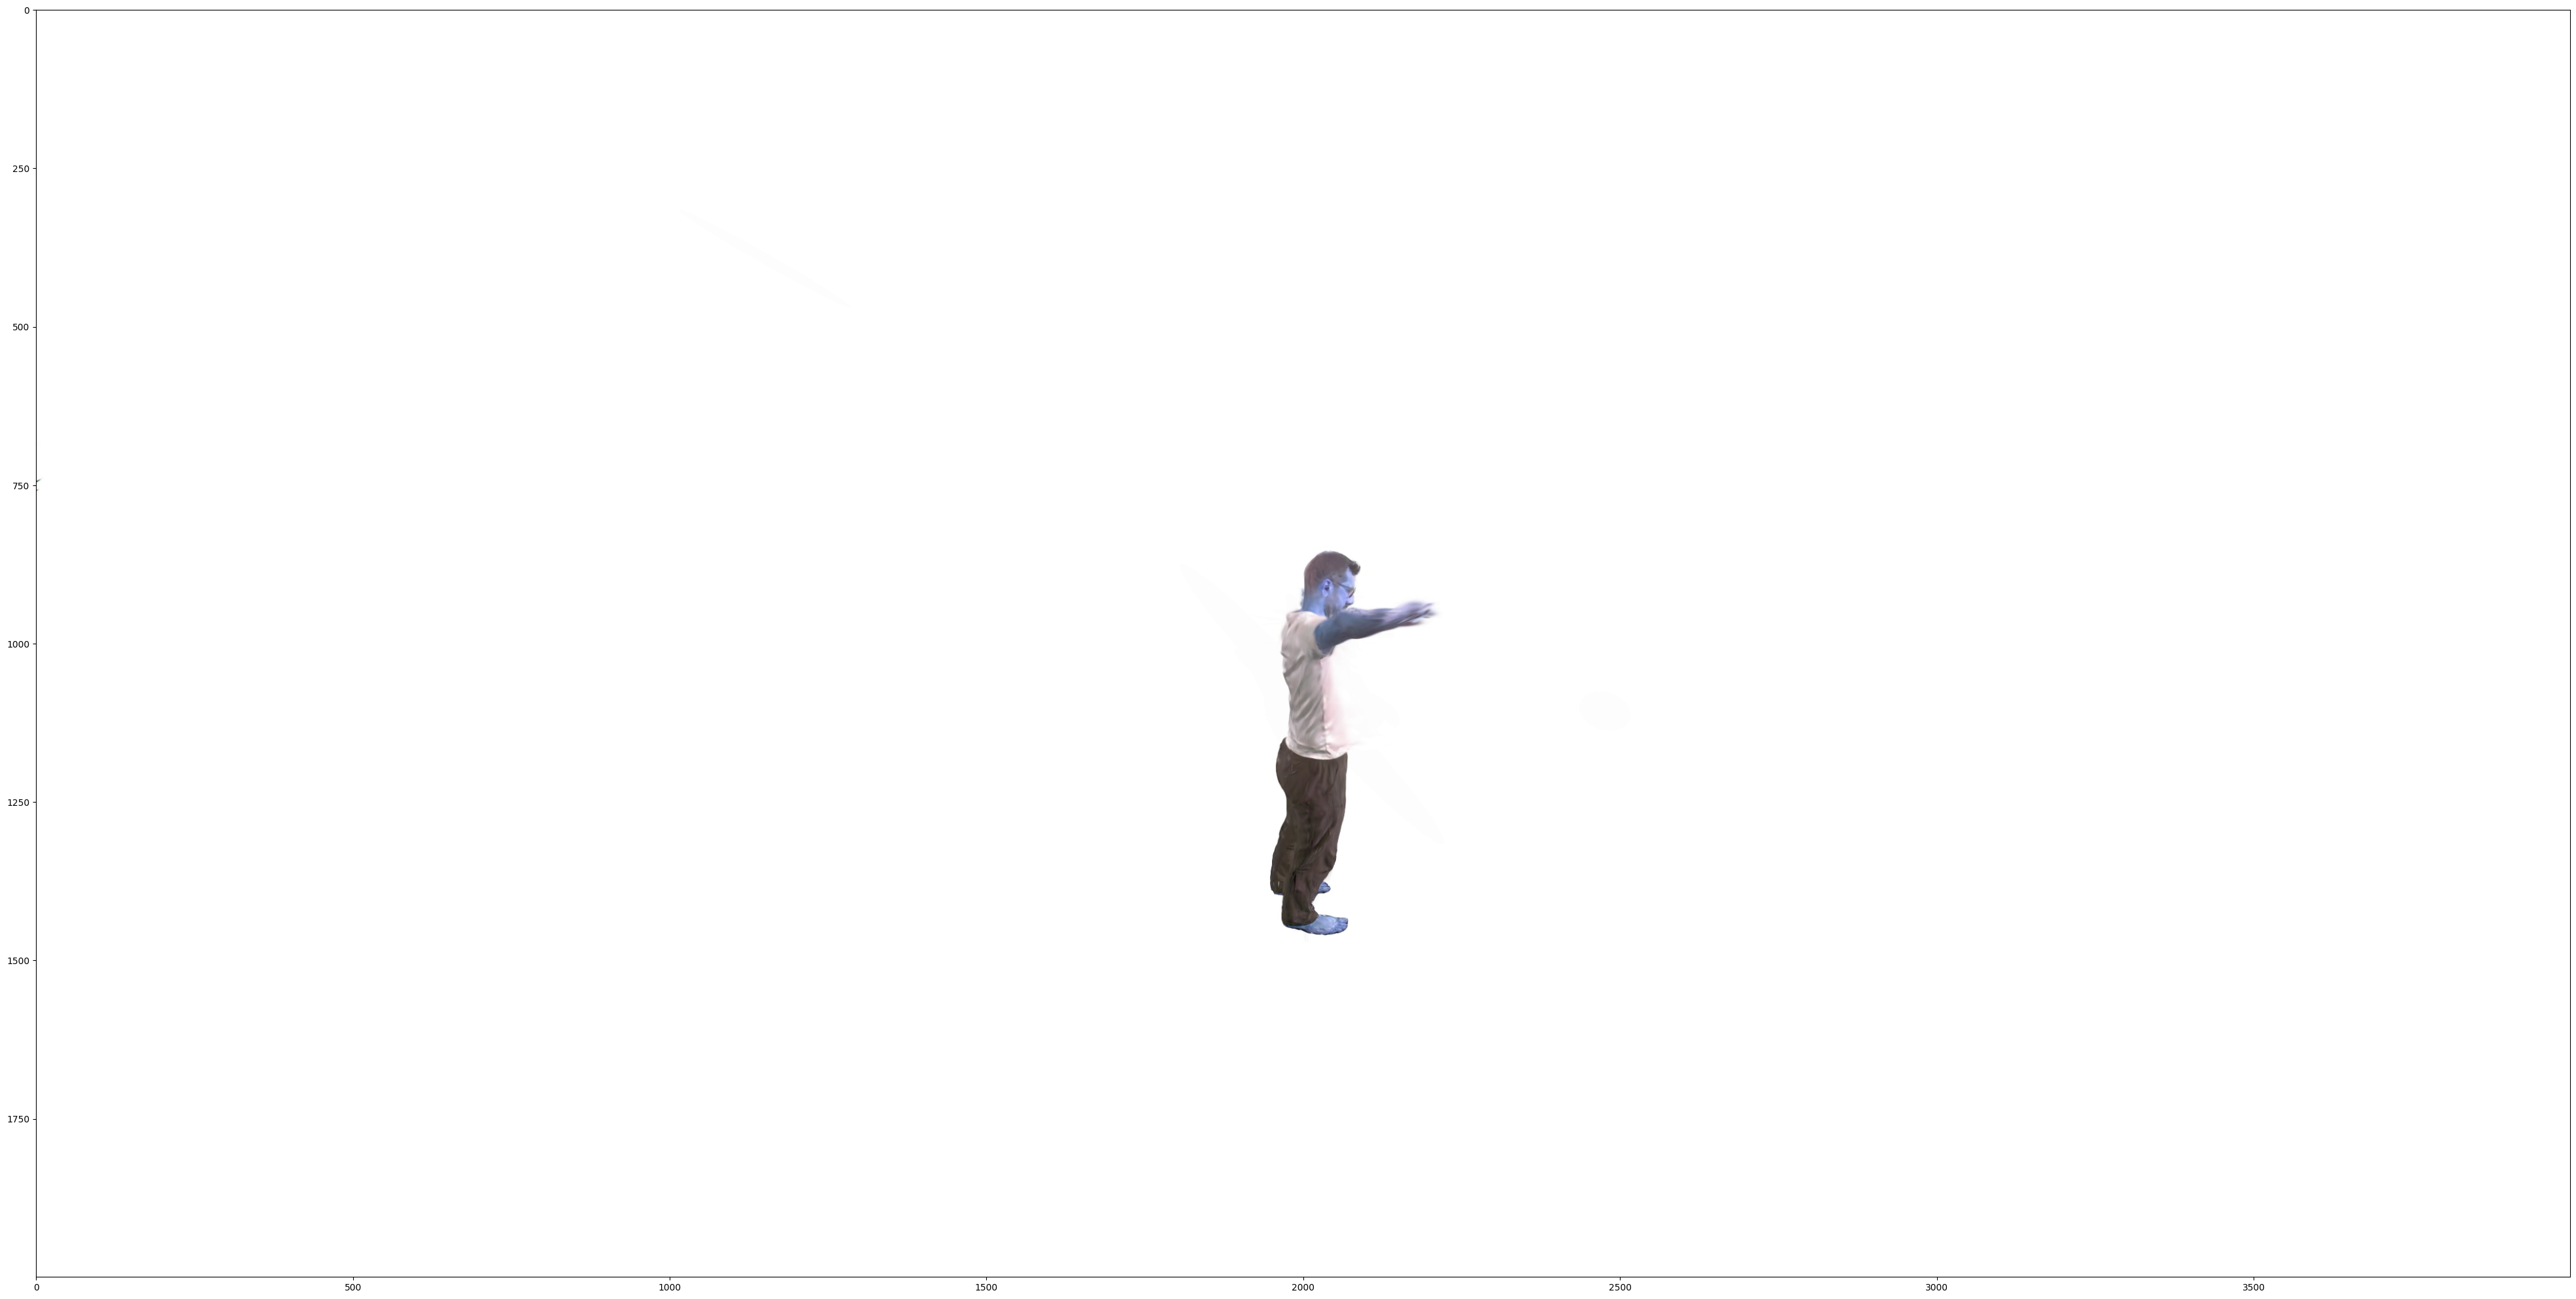

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import time

def show(image):
    plt.figure(figsize=(50, 50))
    plt.imshow(image)
    
def convert(image, from_="bgr", to_="lab"):
    return cv2.cvtColor(image, eval(f"cv2.COLOR_{from_.upper()}2{to_.upper()}"))

def show_channels(image):
    ch1, ch2, ch3 = cv2.split(image)
    plt.figure(figsize=(25, 25))
    for i, image in enumerate([ch1, ch2, ch3]):
        plt.subplot(1, 3, i + 1)
        plt.imshow(image)
        plt.axis('off')

st = time.time()
image_path = "/home/alper/Spaceport/improc/frames/angle_0/video_rgb_4000x2000_0_40.png"
image = cv2.imread(image_path)
image_to_plot = image.copy()

hue, sat, val = cv2.split(convert(image, from_="bgr", to_="hsv"))

kernel = np.ones((5,5),np.uint8)
_, binary_thresh = cv2.threshold(val, 250, 255, cv2.THRESH_BINARY)
median_image = cv2.medianBlur(binary_thresh, 5)
closing = cv2.morphologyEx(median_image, cv2.MORPH_CLOSE, kernel)

analysis = cv2.connectedComponentsWithStats(closing,  
                                            4,  
                                            cv2.CV_32S) 
(totalLabels, label_ids, values, centroid) = analysis 
  
# Initialize a new image to 
# store all the output components 
output = np.zeros(closing.shape, dtype="uint8") 

i = 1
    # Area of the component 
area = values[i, cv2.CC_STAT_AREA]  
    
    # Create a new image for bounding boxes 
new_img=image_to_plot.copy()

# Now extract the coordinate points 
x1 = values[i, cv2.CC_STAT_LEFT] 
y1 = values[i, cv2.CC_STAT_TOP] 
w = values[i, cv2.CC_STAT_WIDTH] 
h = values[i, cv2.CC_STAT_HEIGHT] 

# Coordinate of the bounding box 
pt1 = (x1, y1) 
pt2 = (x1+ w, y1+ h) 
(X, Y) = centroid[i] 

# Bounding boxes for each component 
cv2.rectangle(new_img,pt1,pt2, 
            (0, 255, 0), 3) 
cv2.circle(new_img, (int(X), 
                    int(Y)),  
        4, (0, 0, 255), -1) 

# Create a new array to show individual component 
component = np.zeros(closing.shape, dtype="uint8") 
componentMask = (label_ids == i).astype("uint8") * 255

# Apply the mask using the bitwise operator 
component = cv2.bitwise_or(component,componentMask) 
output = cv2.bitwise_or(output, componentMask) 

print(np.unique(output))
_, binary_thresh = cv2.threshold(output, 0, 255, cv2.THRESH_BINARY_INV)
show(binary_thresh)
print("Consumed time -> ", time.time() - st)
# cv2.imwrite("mask.png", binary_thresh)
# show(binary_thresh)
# show(median_image)
# show(closing)
show(image_to_plot)

### Angle 0 - Mask & Image Test

In [4]:
import cv2
import numpy as np

mask = cv2.imread("mask.png")
image = cv2.imread("/home/alper/Spaceport/improc/frames/angle_0/video_rgb_4000x2000_0_40.png")

